# Leitura de csv para comparação de imagens

In [16]:
import pandas as pd
import cv2
import numpy as np
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm
import matplotlib.pyplot as plt
import os

In [17]:
#desenhar um bloxplot com os valores de mse, ssim e lbp_distance
def boxplot(nomeOriginal, mse_values, ssim_values, lbp_distances):
    numsamples = len(mse_values)
    #titulo da figura
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.boxplot(mse_values)
    plt.title('MSE ')
    plt.subplot(1, 3, 2)
    plt.boxplot(lbp_distances)
    plt.title('LBP Distance ')
    plt.subplot(1, 3, 3)
    plt.boxplot(ssim_values)
    plt.title('DSSIM')
    plt.suptitle(f'{nomeOriginal} - {numsamples} samples', fontsize=16)
    plt.tight_layout()

C:\Users\lucia\AppData\Local\Temp\ipykernel_70060\271179447.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(dssim_grupos, labels=labels, patch_artist=True)


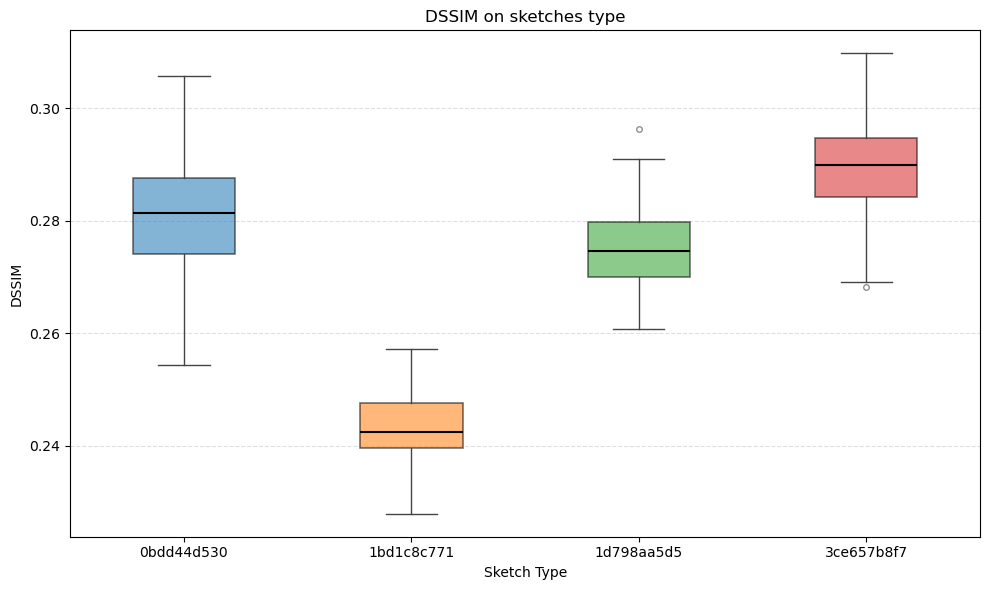

In [44]:
#desenhar um bloxplot com 4 grupos de Dssim comparando 4 imagens
def boxplot_dssim_grupos(arquivos, names):
    dssim_grupos = []
    labels = []
    for arquivo in arquivos:
        df_temp = pd.read_csv(arquivo, sep=';', comment='#')
        dssim_grupos.append(df_temp['dssim'])
        label = None
        for name in names:
            if name in arquivo:
                label = name
                break
        if label is None:
            label = os.path.basename(arquivo)
        labels.append(label)

    # Paleta de cores (expanda se necessário)
    base_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                   '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                   '#bcbd22', '#17becf']
    # Garante cores suficientes
    colors = (base_colors * ((len(dssim_grupos) // len(base_colors)) + 1))[:len(dssim_grupos)]

    fig, ax = plt.subplots(figsize=(10, 6))
    bp = ax.boxplot(dssim_grupos, labels=labels, patch_artist=True)

    # Aplica cores
    for box, color in zip(bp['boxes'], colors):
        box.set(facecolor=color, alpha=0.55, edgecolor='black', linewidth=1.2)
    for median in bp['medians']:
        median.set(color='black', linewidth=1.5)
    for whisker in bp['whiskers']:
        whisker.set(color='#444444')
    for cap in bp['caps']:
        cap.set(color='#444444')
    for flier in bp['fliers']:
        flier.set(marker='o', markerfacecolor='white', alpha=0.6, markeredgecolor='#444444', markersize=4)

    ax.set_title('DSSIM on sketches type')
    ax.set_ylabel('DSSIM')
    ax.set_xlabel('Sketch Type')
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    # (Opcional) legenda de cores
    # handles = [plt.Line2D([0], [0], color=c, lw=8) for c in colors]
    # ax.legend(handles, labels, title='Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Chamada da função
boxplot_dssim_grupos(arquivos, names)

In [18]:
#calcule valores mínimos, q1, q2, mediana, q3 e máximo
def statistics(values):
    n = len(values)
    if n == 0:
        print("No values to calculate statistics.")
        return None, None, None, None, None, None
    min = np.min(values)
    q1 = np.percentile(values, 25)
    q2 = np.median(values)
    q3 = np.percentile(values, 75)
    max = np.max(values)
    mean = np.mean(values)
    print(f"   {min:.2f}, {q1:.2f}, {q2:.2f}, {q3:.2f}, {max:.2f}, {mean:.2f}")
    return n, min, q1, q2, q3, max, mean


In [25]:
#* Selecione path do arquivo contendo 1d798aa5d5
cols=5
names = ['3ce657b8f7', '1d798aa5d5', '1bd1c8c771', '0bdd44d530']
sampleName = '3ce657b8f7'  # ajuste conforme necessário
base_dir = f'result/run_{sampleName}'  # ajuste conforme necessário

#liste todos arqvuios run_metrics csv na pasta result e seus subdiretorios
# que estajam na lista names

arquivos = []
for root, dirs, files in os.walk('result'):
    for f in files:
        if f.startswith('run_') and f.endswith('.csv'):
            arquivos.append(os.path.join(root, f))
            # Filtra arquivos que estão na lista 'names'
            #arquivos = [f for f in arquivos if f in names]

arquivos

['result\\old\\run_metrics.csv',
 'result\\old\\run_metrics_e7057b15.csv',
 'result\\run_0bca43f7ff\\run_metrics_4437042b.csv',
 'result\\run_0bdd44d530\\run_metrics_1c1414c4.csv',
 'result\\run_0c19639aeb\\run_metrics_149c3bb1.csv',
 'result\\run_1bd1c8c771\\run_metrics_c8bb00bd.csv',
 'result\\run_1d798aa5d5\\run_metrics_440d34e4.csv',
 'result\\run_20250913_155213_a3ad2df0\\run_metrics_8ac7ff10.csv',
 'result\\run_2ee6e81e4b\\run_metrics_75f7ec59.csv',
 'result\\run_2ee6e81e4b_1\\run_metrics_50dc01c1.csv',
 'result\\run_2ee6e81e4b_2\\run_metrics_9ce11385.csv',
 'result\\run_3ce657b8f7\\run_metrics_19bd129f.csv',
 'result\\run_5f43816c42\\run_metrics_cc9b30a2.csv',
 'result\\run_5f43816c42_1\\run_metrics_5f43816c42.csv',
 'result\\run_5f43816c42_2\\run_metrics_5f43816c42.csv']

In [41]:
arquivos

['result\\run_0bdd44d530\\run_metrics_1c1414c4.csv',
 'result\\run_1bd1c8c771\\run_metrics_c8bb00bd.csv',
 'result\\run_1d798aa5d5\\run_metrics_440d34e4.csv',
 'result\\run_3ce657b8f7\\run_metrics_19bd129f.csv']

In [ ]:
#procure se string existe em names
subset = []
for f in arquivos:
    if any(name in f for name in names[0:4]):
        print(f"{f} in names")
        subset.append(f)

subset

In [40]:
# Seleciona um arquivo de métricas
# Caso já existam caminhos absolutos em 'arquivos', NÃO prefixar com 'result'.
# Se quiser pegar sempre o mais recente: ordenar por mtime.
import os, time



# Ordena por data de modificação (mais recente primeiro)
arquivos_ordenados = sorted(arquivos, key=lambda p: os.path.getmtime(p), reverse=True)

# Escolhe o primeiro (mais recente) ou um índice específico
indice = 0  # altere para outro índice se quiser
meuarquivo = arquivos_ordenados[indice]

# Garante que é caminho existente
if not os.path.exists(meuarquivo):
    raise FileNotFoundError(f"O arquivo {meuarquivo} não foi encontrado.")
print(f"metrics CSV selecionado: {meuarquivo}")

metrics CSV selecionado: result\run_1d798aa5d5\run_metrics_440d34e4.csv


In [ ]:
# Cria colunas normalizadas (0..1) e uma coluna ponderada combinando dssim e lbp_distance
# Pressupõe que o DataFrame 'df' já contém as colunas 'dssim' e 'lbp_distance'

# Pesos (ajuste conforme necessidade)
w_dssim = 0.5
w_lbp   = 0.5
assert abs(w_dssim + w_lbp - 1.0) < 1e-9, "Os pesos devem somar 1"

# Função util para normalização segura
def minmax_norm(series):
    s_min = series.min()
    s_max = series.max()
    if pd.isna(s_min) or pd.isna(s_max):
        return pd.Series([0.0]*len(series), index=series.index)
    rng = s_max - s_min
    if rng == 0:
        # todos valores iguais -> retorna zeros
        return pd.Series([0.0]*len(series), index=series.index)
    return (series - s_min) / rng

# Normaliza (0 = melhor pois é distância pequena, 1 = pior) para cada métrica
df['dssim_norm']        = minmax_norm(df['dssim'])
df['lbp_distance_norm'] = minmax_norm(df['lbp_distance'])

# Combinação ponderada como distância (0 melhor, 1 pior)
df['weighted_distance'] = w_dssim * df['dssim_norm'] + w_lbp * df['lbp_distance_norm']

# Se quiser também uma pontuação onde 1 é melhor (similaridade), inverta:
df['weighted_similarity'] = 1.0 - df['weighted_distance']

# Mostra amostra das novas colunas
cols_show = ['dssim','dssim_norm','lbp_distance','lbp_distance_norm','weighted_distance','weighted_similarity']
df[cols_show].head() = pd.read_csv(meuarquivo, sep=';', comment='#')

In [55]:
arquivos
df_temp = pd.read_csv('result\\run_5f43816c42_1\\run_metrics_5f43816c42.csv', sep=';', comment='#')

In [ ]:
for arquivo in arquivos:
    print(arquivo)


In [ ]:
# Carregar e concatenar todos os arquivos CSV em um único DataFrame
df_list = []
for arquivo in arquivos:
    df_temp = pd.read_csv(arquivo, sep=';', comment='#')
    df_list.append(df_temp)
df = pd.concat(df_list, ignore_index=True)


In [24]:
expected_cols = ['iteration', 'output_file', 'time_sec', 'mse', 'dssim', 'lbp_distance']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    print('Colunas presentes no arquivo:', list(df.columns))
    raise ValueError(f'Colunas esperadas ausentes: {missing}')
else:
    print('Todas as colunas esperadas estão presentes.')

Todas as colunas esperadas estão presentes.


In [25]:
# Garante tipos numéricos onde necessário
numeric_cols = ['time_sec', 'mse', 'dssim', 'lbp_distance']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [27]:
# Calcula estatísticas
stats_df = pd.DataFrame({
    'min': df[numeric_cols].min(),
    'Q1': df[numeric_cols].quantile(0.25),
    'median': df[numeric_cols].median(),
    'Q3': df[numeric_cols].quantile(0.75),
    'max': df[numeric_cols].max(),
    'mean': df[numeric_cols].mean(),
    'std': df[numeric_cols].std(),
    'count': df[numeric_cols].count()
})

print('\nEstatísticas descritivas por métrica:')
print(stats_df)



Estatísticas descritivas por métrica:
                     min          Q1      median          Q3         max  \
time_sec       14.871045   15.195804   15.486674   15.865860   18.200117   
mse           389.264092  449.302471  480.838104  530.624252  601.308009   
dssim           0.167821    0.193929    0.202580    0.212282    0.228215   
lbp_distance    0.183943    0.216902    0.241783    0.264027    0.303772   

                    mean        std  count  
time_sec       15.657115   0.693461     50  
mse           491.960690  53.205281     50  
dssim           0.201762   0.014080     50  
lbp_distance    0.240429   0.027344     50  


In [28]:
# Salva ao lado do CSV original
out_dir = os.path.dirname(meuarquivo)
out_path = os.path.join(out_dir, 'summary_stats.csv')
stats_df.to_csv(out_path, sep=';', float_format='%.6f')
print(f'Arquivo de estatísticas salvo em: {out_path}')


Arquivo de estatísticas salvo em: result\run_2ee6e81e4b\summary_stats.csv


In [ ]:
out_dir = os.path.dirname(arquivo)  
out_path = os.path.join(out_dir, f'summary_stats_{nomeOriginal}.csv')
stats_df.to_csv(out_path, sep=';', float_format='%.6f', index=False)

# BOXPLOT


Estatísticas descritivas para run_metrics_1c1414c4:
   min, Q1, median, Q3, max, mean, std, count
mse: 718.12, 855.92, 916.33, 963.64, 1098.81, 908.04, 81.45, 50
dssim: 0.2544, 0.2741, 0.2814, 0.2876, 0.3057, 0.2814, 0.0119, 50
lbp_distance: 0.08, 0.15, 0.20, 0.25, 0.39, 0.20, 0.07, 50

Estatísticas descritivas para run_metrics_c8bb00bd:
   min, Q1, median, Q3, max, mean, std, count
mse: 651.21, 686.99, 718.47, 740.92, 794.37, 717.05, 34.81, 50
dssim: 0.2279, 0.2395, 0.2424, 0.2475, 0.2572, 0.2430, 0.0064, 50
lbp_distance: 0.12, 0.13, 0.15, 0.17, 0.20, 0.15, 0.02, 50

Estatísticas descritivas para run_metrics_440d34e4:
   min, Q1, median, Q3, max, mean, std, count
mse: 511.83, 535.13, 542.87, 556.09, 620.87, 546.59, 22.53, 50
dssim: 0.2608, 0.2701, 0.2746, 0.2798, 0.2963, 0.2756, 0.0071, 50
lbp_distance: 0.04, 0.07, 0.08, 0.09, 0.11, 0.08, 0.01, 50

Estatísticas descritivas para run_metrics_19bd129f:
   min, Q1, median, Q3, max, mean, std, count
mse: 987.74, 1056.76, 1093.89, 1127.13,

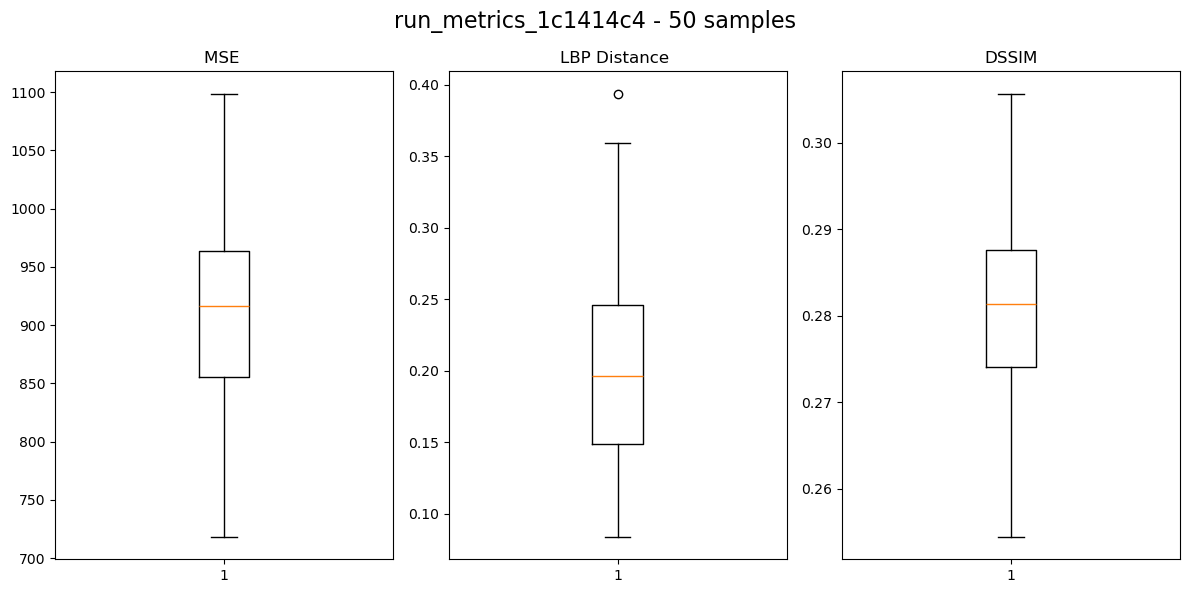

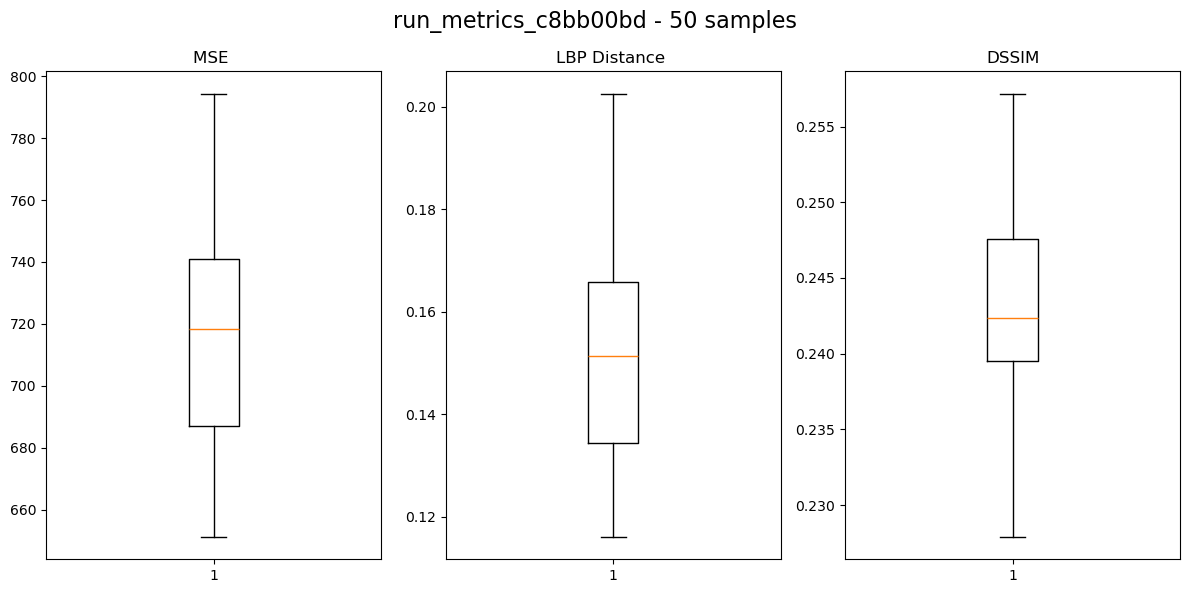

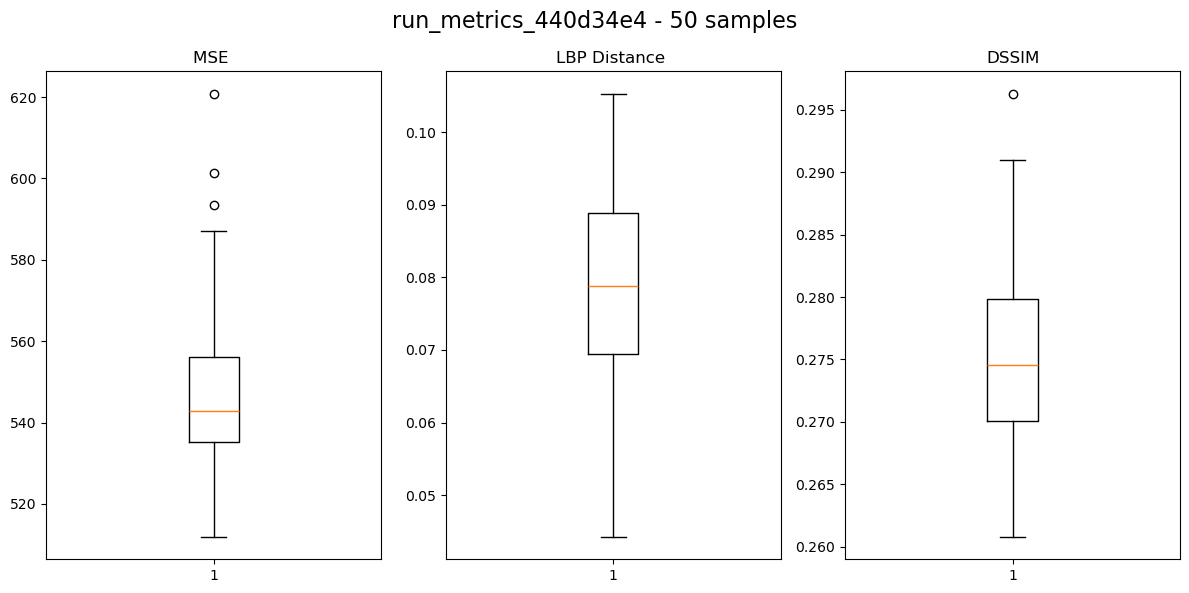

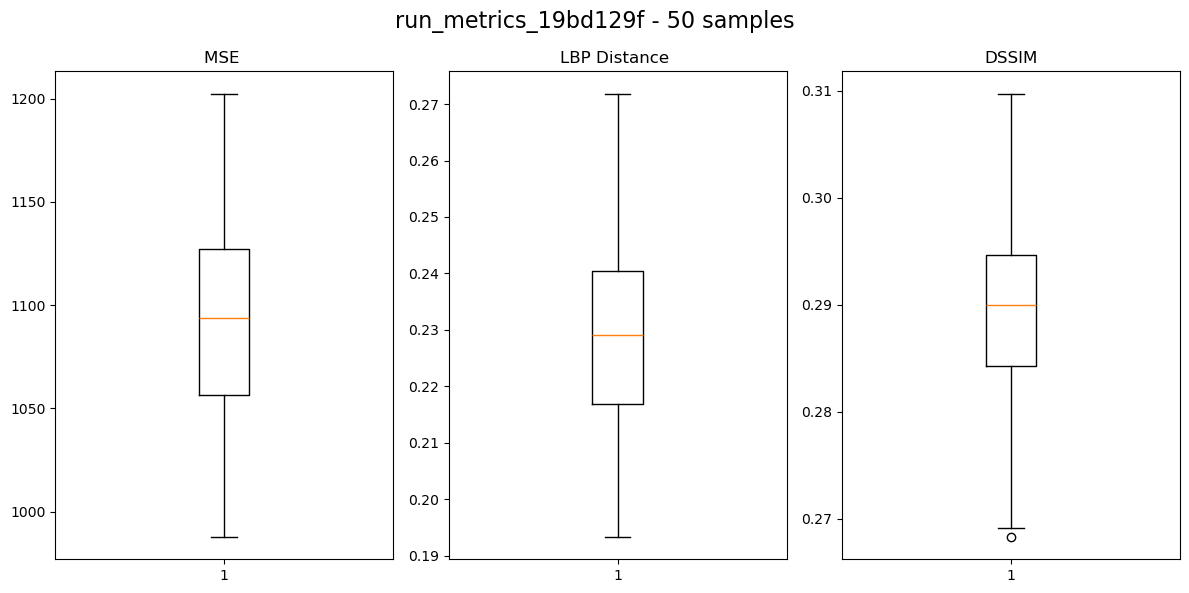

In [39]:
#criar um boxplot para cada arquivo de metrics csv na pasta result e seus subdiretorios
arquivos = subset
for arquivo in arquivos:
    df_temp = pd.read_csv(arquivo, sep=';', comment='#')
    nomeOriginal = os.path.basename(arquivo).split('.')[0]
    boxplot(nomeOriginal, df_temp['mse'], df_temp['dssim'], df_temp['lbp_distance'])
    #calcula estatisticas por métrica
    print(f'\nEstatísticas descritivas para {nomeOriginal}:')
    stats = {
        'metric': ['mse', 'dssim', 'lbp_distance'],
        'min': [df_temp['mse'].min(), df_temp['dssim'].min(), df_temp['lbp_distance'].min()],
        'Q1': [df_temp['mse'].quantile(0.25), df_temp['dssim'].quantile(0.25), df_temp['lbp_distance'].quantile(0.25)],
        'median': [df_temp['mse'].median(), df_temp['dssim'].median(), df_temp['lbp_distance'].median()],
        'Q3': [df_temp['mse'].quantile(0.75), df_temp['dssim'].quantile(0.75), df_temp['lbp_distance'].quantile(0.75)],
        'max': [df_temp['mse'].max(), df_temp['dssim'].max(), df_temp['lbp_distance'].max()],
        'mean': [df_temp['mse'].mean(), df_temp['dssim'].mean(), df_temp['lbp_distance'].mean()],
        'std': [df_temp['mse'].std(), df_temp['dssim'].std(), df_temp['lbp_distance'].std()],
        'count': [df_temp['mse'].count(), df_temp['dssim'].count(), df_temp['lbp_distance'].count()]
    }
    print (f"   min, Q1, median, Q3, max, mean, std, count")
    print (f"mse: {stats['min'][0]:.2f}, {stats['Q1'][0]:.2f}, {stats['median'][0]:.2f}, {stats['Q3'][0]:.2f}, {stats['max'][0]:.2f}, {stats['mean'][0]:.2f}, {stats['std'][0]:.2f}, {stats['count'][0]}")
    print (f"dssim: {stats['min'][1]:.4f}, {stats['Q1'][1]:.4f}, {stats['median'][1]:.4f}, {stats['Q3'][1]:.4f}, {stats['max'][1]:.4f}, {stats['mean'][1]:.4f}, {stats['std'][1]:.4f}, {stats['count'][1]}")
    print (f"lbp_distance: {stats['min'][2]:.2f}, {stats['Q1'][2]:.2f}, {stats['median'][2]:.2f}, {stats['Q3'][2]:.2f}, {stats['max'][2]:.2f}, {stats['mean'][2]:.2f}, {stats['std'][2]:.2f}, {stats['count'][2]}")
    stats_df = pd.DataFrame(stats)



In [23]:
# Agregar estatísticas de TODOS os arquivos de métricas em um único CSV
import pandas as pd, os

registros = []
for arquivo in arquivos:
    try:
        df_temp = p.read_csv(arquivo, sep=';', comment='#')
    except Exception as e:
        print(f"Falha ao ler {arquivo}: {e}")
        continue
    # Verifica colunas essenciais
    if not all(col in df_temp.columns for col in ['mse', 'dssim', 'lbp_distance', 'iteration', 'time_sec']):
        print(f"Colunas esperadas ausentes em {arquivo}. Pulando.")
        continue
    nome_run = os.path.basename(os.path.dirname(arquivo))  # pasta run_...
    base_csv = os.path.basename(arquivo)
    # Estatísticas por métrica
    for metric in ['mse', 'dssim', 'lbp_distance', 'time_sec']:
        serie = df_temp[metric].dropna()
        if serie.empty:
            continue
        registros.append({
            'run_dir': nome_run,
            'csv_file': base_csv,
            'metric': metric,
            'min': serie.min(),
            'Q1': serie.quantile(0.25),
            'median': serie.median(),
            'Q3': serie.quantile(0.75),
            'max': serie.max(),
            'mean': serie.mean(),
            'std': serie.std(),
            'count': serie.count()
        })

if not registros:
    raise RuntimeError('Nenhuma estatística calculada. Verifique se os arquivos possuem as colunas esperadas.')

summary_all = pd.DataFrame(registros)
# Ordena para facilitar leitura
summary_all = summary_all.sort_values(by=['metric', 'run_dir']).reset_index(drop=True)

# Caminho de saída único
out_path = os.path.join('result', 'all_runs_summary_stats.csv')
summary_all.to_csv(out_path, sep=';', index=False, float_format='%.6f')
print(f'Estatísticas agregadas salvas em: {out_path}')
summary_all.head(20)

Estatísticas agregadas salvas em: result\all_runs_summary_stats.csv


,run_dir,csv_file,metric,min,Q1,median,Q3,max,mean,std,count
0,run_0bca43f7ff,run_metrics_4437042b.csv,dssim,0.196446,0.203687,0.209047,0.213503,0.226367,0.208762,0.006537,50
1,run_0c19639aeb,run_metrics_149c3bb1.csv,dssim,0.196502,0.208476,0.215942,0.222922,0.240406,0.216304,0.010884,50
2,run_20250913_155213_a3ad2df0,run_metrics_8ac7ff10.csv,dssim,0.332100,0.347850,0.356595,0.368704,0.385665,0.357852,0.014219,31
3,run_20250913_162222_3728be04,run_metrics_c8bb00bd.csv,dssim,0.227894,0.239504,0.242374,0.247543,0.257179,0.242963,0.006439,50
4,run_20250913_190017_3eccce87,run_metrics_1c1414c4.csv,dssim,0.254412,0.274087,0.281408,0.287590,0.305702,0.281439,0.011858,50
5,run_20250913_205605_b31cd115,run_metrics_19bd129f.csv,dssim,0.268266,0.284244,0.289984,0.294663,0.309754,0.289272,0.008063,50
6,run_20250913_211128_835547f6,run_metrics_440d34e4.csv,dssim,0.260763,0.270063,0.274552,0.279844,0.296307,0.275567,0.007137,50
7,run_2ee6e81e4b,run_metrics_50dc01c1.csv,dssim,0.165503,0.193576,0.202630,0.221406,0.238036,0.205568,0.018359,50
8,run_5f43816c42,run_metrics_cc9b30a2.csv,dssim,0.211394,0.232580,0.239879,0.260909,0.290510,0.245530,0.019569,50
9,run_0bca43f7ff,run_metrics_4437042b.csv,lbp_distance,0.070720,0.105450,0.113574,0.132753,0.230006,0.117037,0.028916,50
